### Metoda eliminacji i akceptacji

1. Wybór przedzialu wartości x
2. Losujemy x z wybranego przedziału
3. Obliczamy maksymalna wartość funkcji gęstości w danym przedziale:

Dla rozkładu normalnego będzie to 1/sqrt(2pi)

4. Losujemy liczbę r z przedzialu (0,1)
5. Sprawdzamy warunek

r < f(x)/fmax

6. Gdy warunek nie jest spełniony odrzucamy liczbe i powtarzamy kroki



In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

In [3]:
def hit_or_miss():
  iterations = 0
  while True:
    iterations += 1
    x = np.random.uniform(-5, 5)
    r = np.random.uniform(0, 1)

    if r <= np.exp(-x**2 / 2):
      return x, iterations


In [4]:
simulations = 1_000_000
samples = []
iterations = 0

In [5]:
for _ in range(simulations):
  num, found_after_iterations = hit_or_miss()
  samples.append(num)
  iterations += found_after_iterations

print(f'Utilization: {simulations / iterations}%')

Utilization: 0.25083616234718437%


In [6]:
samples = []
iterations = 0

In [7]:
while iterations < simulations:
  num, found_after_iterations = hit_or_miss()
  samples.append(num)
  iterations += found_after_iterations

print(f'Utilization: {len(samples) / iterations}%')

Utilization: 0.25022974977025025%


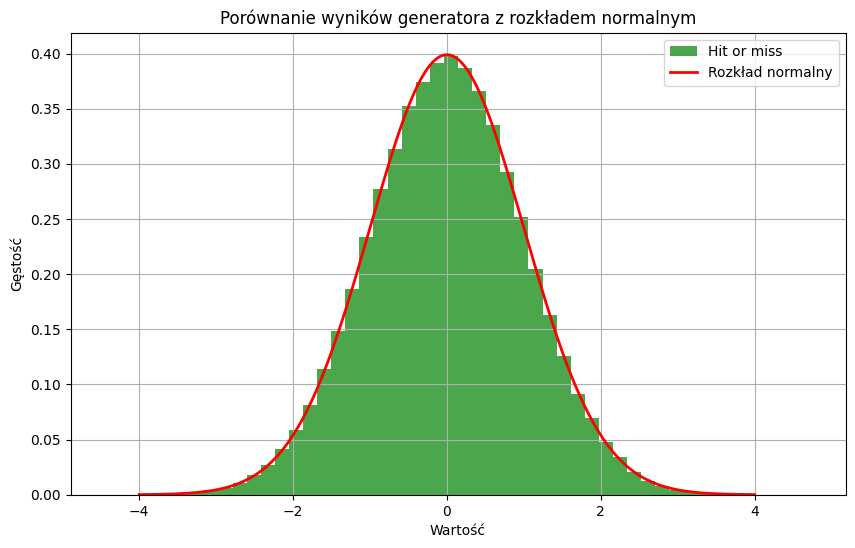

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(np.array(samples), bins=50, density=True, alpha=0.7, color='green', label="Hit or miss")

x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x, 0, 1)
plt.plot(x, pdf, color='red', lw=2, label='Rozkład normalny')

plt.title('Porównanie wyników generatora z rozkładem normalnym')
plt.xlabel('Wartość')
plt.ylabel('Gęstość')
plt.legend()
plt.grid(True)
plt.show()